In [180]:
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.max_columns = 100
%matplotlib inline 
from sklearn.linear_model import LogisticRegression
import numpy as np
from scipy.spatial.distance import euclidean
from tqdm.notebook import trange

Прогноз сердечной недостаточности

In [181]:
data_1 = pd.read_csv("datasets_727551_1263738_heart_failure_clinical_records_dataset.csv", sep=",")
data_1.shape
data_1.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


1. age - возраст
2. anaemia - анемия
3. creatinine_phosphokinase - Уровень фермента СРК (креатинкиназа) в крови (мкг / л)
4. diabetes - сахарный диабет
5. ejection_fraction - фракция выброса в %
6. high_blood_pressure - повышенное артериальное давление
7. platelets - тромбоциты
8. serum_creatinine - уровень сывороточного креатинина в крови (мг / дл)
9. serum_sodium - Уровень сывороточного натрия в крови (мг-экв / л)
10. sex - пол (0 - женщины, 1 - мужчины)
11. smoking - курение
12. time - период наблюдения (дни)
13. DEATH_EVENT - факт смерти в период наблюдения (в среднем 130 дней)

In [182]:
print('Выборочное среднее:')
print(data_1['age'].mean(), data_1['anaemia'].mean(), data_1['creatinine_phosphokinase'].mean(), data_1['diabetes'].mean(), data_1['ejection_fraction'].mean(), data_1['high_blood_pressure'].mean(), data_1['platelets'].mean(), data_1['serum_creatinine'].mean(), data_1['serum_sodium'].mean(), data_1['sex'].mean(), data_1['smoking'].mean(), data_1['time'].mean(), data_1['DEATH_EVENT'].mean())
print()

print('Дисперсия:')
print(data_1['age'].var(), data_1['anaemia'].var(), data_1['creatinine_phosphokinase'].var(), data_1['diabetes'].var(), data_1['ejection_fraction'].var(), data_1['high_blood_pressure'].var(), data_1['platelets'].var(), data_1['serum_creatinine'].var(), data_1['serum_sodium'].var(), data_1['sex'].var(), data_1['smoking'].var(), data_1['time'].var(), data_1['DEATH_EVENT'].var())
print()

print('Среднее квадратическое отклонение:')
print(data_1['age'].std(), data_1['anaemia'].std(), data_1['creatinine_phosphokinase'].std(), data_1['diabetes'].std(), data_1['ejection_fraction'].std(), data_1['high_blood_pressure'].std(), data_1['platelets'].std(), data_1['serum_creatinine'].std(), data_1['serum_sodium'].std(), data_1['sex'].std(), data_1['smoking'].std(), data_1['time'].std(), data_1['DEATH_EVENT'].std())
print()

Выборочное среднее:
60.83389297658862 0.431438127090301 581.8394648829432 0.4180602006688963 38.08361204013378 0.3511705685618729 263358.02926421404 1.3938795986622072 136.62541806020067 0.6488294314381271 0.3210702341137124 130.2608695652174 0.3210702341137124

Дисперсия:
141.48648290797067 0.24612242149446703 941458.5714574308 0.24410226482009384 140.0634553657606 0.22861439698323271 9565668749.448881 1.070211072703194 19.469955781015017 0.22861439698323271 0.21871562927880403 6023.965275751386 0.21871562927880403

Среднее квадратическое отклонение:
11.89480907404447 0.4961072681330793 970.2878807124362 0.49406706510360904 11.834840741039171 0.47813637906274475 97804.2368685983 1.0345100640898541 4.412477283909235 0.47813637906274475 0.46767042805677167 77.61420795029339 0.46767042805677167



(array([ 5., 18., 70., 49., 77., 20., 21.,  3., 33.,  1.,  1.,  1.]),
 array([14. , 19.5, 25. , 30.5, 36. , 41.5, 47. , 52.5, 58. , 63.5, 69. ,
        74.5, 80. ]),
 <a list of 12 Patch objects>)

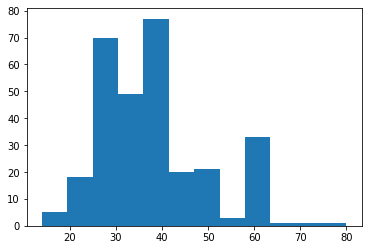

In [183]:
plt.hist(data_1['ejection_fraction'], bins=12) 

(array([198.,  66.,  18.,   5.,   5.,   1.,   1.,   2.,   1.,   0.,   0.,
          2.]),
 array([0.5       , 1.24166667, 1.98333333, 2.725     , 3.46666667,
        4.20833333, 4.95      , 5.69166667, 6.43333333, 7.175     ,
        7.91666667, 8.65833333, 9.4       ]),
 <a list of 12 Patch objects>)

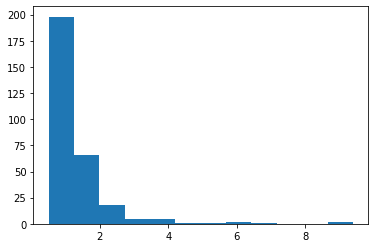

In [184]:
plt.hist(data_1['serum_creatinine'], bins=12) 

(array([18., 29., 46., 32., 48., 41., 40., 15., 13.,  9.,  5.,  3.]),
 array([40.        , 44.58333333, 49.16666667, 53.75      , 58.33333333,
        62.91666667, 67.5       , 72.08333333, 76.66666667, 81.25      ,
        85.83333333, 90.41666667, 95.        ]),
 <a list of 12 Patch objects>)

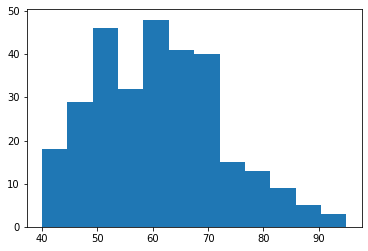

In [185]:
plt.hist(data_1['age'], bins=12) 

In [186]:
data_1_corr = data_1[['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time', 'DEATH_EVENT']].corr()
data_1_corr

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


In [187]:
data_1

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


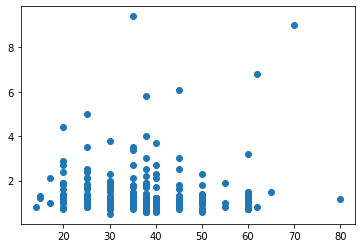

In [188]:
plt.scatter(data_1['ejection_fraction'], data_1['serum_creatinine'])
plt.show()

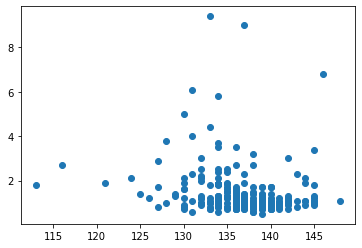

In [189]:
plt.scatter(data_1['serum_sodium'], data_1['serum_creatinine'])
plt.show()

In [190]:
data_1.head(2)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1


In [191]:
# нормализация данных
data_1_n = data_1.copy()
data_1_n['age'] = (data_1['age']-data_1['age'].mean()) / data_1['age'].std()
data_1_n['creatinine_phosphokinase'] = (data_1['creatinine_phosphokinase']-data_1['creatinine_phosphokinase'].mean()) / data_1['creatinine_phosphokinase'].std()
data_1_n['ejection_fraction'] = (data_1['ejection_fraction']-data_1['ejection_fraction'].mean()) / data_1['ejection_fraction'].std()
data_1_n['platelets'] = (data_1['platelets']-data_1['platelets'].mean()) / data_1['platelets'].std()
data_1_n['serum_creatinine'] = (data_1['serum_creatinine']-data_1['serum_creatinine'].mean()) / data_1['serum_creatinine'].std()
data_1_n['serum_sodium'] = (data_1['serum_sodium']-data_1['serum_sodium'].mean()) / data_1['serum_sodium'].std()
data_1_n

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,1.190949,0,0.000165,0,-1.527998,1,1.678834e-02,0.489237,-1.501519,1,0,4,1
1,-0.490457,0,7.502063,0,-0.007065,0,7.523048e-09,-0.284076,-0.141739,1,0,6,1
2,0.350246,0,-0.449186,0,-1.527998,0,-1.036336e+00,-0.090748,-1.728149,1,1,7,1
3,-0.910808,1,-0.485257,0,-1.527998,0,-5.455595e-01,0.489237,0.084892,1,0,7,1
4,0.350246,1,-0.434757,1,-1.527998,0,6.507077e-01,1.262550,-4.674340,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,0.098035,0,-0.536789,1,-0.007065,1,-1.107907e+00,-0.284076,1.444672,1,1,270,0
295,-0.490457,0,1.276075,0,-0.007065,0,6.791087e-02,-0.187412,0.538152,0,0,271,0
296,-1.331160,0,1.523425,1,1.851853,0,4.893878e+00,-0.574068,0.311522,0,0,278,0
297,-1.331160,0,1.887234,0,-0.007065,0,-1.261275e+00,0.005916,0.764782,1,1,280,0


In [192]:
model = LogisticRegression(solver='liblinear', fit_intercept=False)
ones = np.ones((data_1_n.shape[0], 1))
x = pd.DataFrame(ones)
x[1] = data_1_n['ejection_fraction']

y = data_1_n['DEATH_EVENT']

model.fit(x, y)
b_sklearn = model.coef_.flatten()

print(f'Коэффициенты: {b_sklearn}')
print(f'Число итераций: {model.n_iter_}')

Коэффициенты: [-0.81105773 -0.64687398]
Число итераций: [4]


In [218]:
model = LogisticRegression(solver='liblinear', fit_intercept=False)
ones = np.ones((data_1_n.shape[0], 1))
x = pd.DataFrame(ones)
x[1] = data_1_n['serum_creatinine']

y = data_1_n['DEATH_EVENT']

model.fit(x, y)
b_sklearn = model.coef_.flatten()

print(f'Коэффициенты: {b_sklearn}')
print(f'Число итераций: {model.n_iter_}')

Коэффициенты: [-0.73232207  0.82073651]
Число итераций: [4]


In [219]:
model = LogisticRegression(solver='liblinear', fit_intercept=False)
ones = np.ones((data_1_n.shape[0], 1))
x = pd.DataFrame(ones)
x[1] = data_1_n['creatinine_phosphokinase']

y = data_1_n['DEATH_EVENT']

model.fit(x, y)
b_sklearn = model.coef_.flatten()

print(f'Коэффициенты: {b_sklearn}')
print(f'Число итераций: {model.n_iter_}')

Коэффициенты: [-0.73966054  0.12384363]
Число итераций: [3]


In [193]:
model = LogisticRegression(solver='liblinear', fit_intercept=False)
ones = np.ones((data_1_n.shape[0], 1))
x = pd.DataFrame(ones)
x[1] = data_1_n['ejection_fraction']
x[2] = data_1_n['serum_creatinine']

y = data_1_n['DEATH_EVENT']

model.fit(x, y)
b_sklearn = model.coef_.flatten()

print(f'Коэффициенты: {b_sklearn}')
print(f'Число итераций: {model.n_iter_}')

Коэффициенты: [-0.83620773 -0.68524142  0.75047455]
Число итераций: [4]


In [220]:
model = LogisticRegression(solver='liblinear', fit_intercept=False)
ones = np.ones((data_1_n.shape[0], 1))
x = pd.DataFrame(ones)
x[1] = data_1_n['ejection_fraction']
x[2] = data_1_n['serum_creatinine']
x[3] = data_1_n['creatinine_phosphokinase']

y = data_1_n['DEATH_EVENT']

model.fit(x, y)
b_sklearn = model.coef_.flatten()

print(f'Коэффициенты: {b_sklearn}')
print(f'Число итераций: {model.n_iter_}')

Коэффициенты: [-0.83999404 -0.68226838  0.76035093  0.13054162]
Число итераций: [4]


Набор данных: Вероятность сердечного приступа

In [194]:
data = pd.read_csv("datasets_737503_1278636_heart.csv", sep=",")
data.shape
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


https://www.kaggle.com/nareshbhat/health-care-data-set-on-heart-attack-possibility/data

1. age: возраст в годах
2. sex: пол (1 = мужчина; 0 = женщина)
3. cp: тип боли в груди
    - Значение 0: типичная стенокардия
    - Значение 1: атипичная стенокардия
    - Значение 2: неангинальная боль
    - Значение 3: бессимптомное
4. trestbps: верхнее артериальное давление в состоянии покоя (в мм рт. ст. при поступлении в больницу)
5. холестерин: в сыворотке холестерин в мг/дл
6. fbs: (уровень глюкозы в крови натощак > 120 мг/дл) (1 = истина; 0 = ложь)
7. restecg: результаты электрокардиографии в состоянии покоя
    - Значение 0: нормальное
    - Значение 1: аномалия волны ST-T (инверсия зубца T и / или повышение или депрессия ST> 0,05 мВ)
    - Значение 2: показ вероятной или определенной гипертрофии левого желудочка по критериям Эстеса
8. thalach: максимальная частота сердечных сокращений во время пробы 
9. exang: стенокардия, вызванная физической нагрузкой (1 = да; 0 = нет)
10. oldpeak = депрессия ST, вызванная физическими упражнениями относительно отдыха
11. slope: наклон ST-сегмента
    - значение 0: наклон вверх
    - значение 1: ровно
    - значение 2: наклон вниз
12. ca: количество крупных сосудов (0-3), окрашенных с помощью флуороскопии
13. thal: 0 = нормальный; 1 = исправленный дефект; 2 = обратимый дефект
14. target: 0 = маленькая вероятность сердечного приступа, 1 = большая вероятность того, что это сердечный приступ

In [195]:
data.shape

(303, 14)

In [196]:
data.count()

age         303
sex         303
cp          303
trestbps    303
chol        303
fbs         303
restecg     303
thalach     303
exang       303
oldpeak     303
slope       303
ca          303
thal        303
target      303
dtype: int64

In [197]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [198]:
data.loc[(data['ca']>3)] = 3

In [199]:
print('Выборочное среднее:')
print(data['age'].mean(), data['sex'].mean(), data['cp'].mean(), data['trestbps'].mean(), data['chol'].mean(), data['fbs'].mean(), data['restecg'].mean(), data['thalach'].mean(), data['exang'].mean(), data['oldpeak'].mean(), data['slope'].mean(), data['ca'].mean(), data['thal'].mean(), data['target'].mean())
print()

print('Дисперсия:')
print(data['age'].var(), data['sex'].var(), data['cp'].var(), data['trestbps'].var(), data['chol'].var(), data['fbs'].var(), data['restecg'].var(), data['thalach'].var(), data['exang'].var(), data['oldpeak'].var(), data['slope'].var(), data['ca'].var(), data['thal'].var(), data['target'].var())
print()

print('Среднее квадратическое отклонение:')
print(data['age'].std(), data['sex'].std(), data['cp'].std(), data['trestbps'].std(), data['chol'].std(), data['fbs'].std(), data['restecg'].std(), data['thalach'].std(), data['exang'].std(), data['oldpeak'].std(), data['slope'].std(), data['ca'].std(), data['thal'].std(), data['target'].std())
print()

Выборочное среднее:
53.66006600660066 0.7161716171617162 0.9933993399339934 129.45874587458746 242.88118811881188 0.19471947194719472 0.5643564356435643 147.04950495049505 0.37293729372937295 1.0874587458745872 1.4224422442244224 0.7128712871287128 2.3234323432343236 0.5808580858085809

Дисперсия:
123.40392979695322 0.303280659191747 1.1191615850326753 576.2424977597097 3616.992459510852 0.2566607654142897 0.37250016392367713 868.8220444561013 0.3339671715515923 1.394411732563985 0.416978121653225 0.9537079535768147 0.3784888422617096 0.3436058837671846

Среднее квадратическое отклонение:
11.108732141741164 0.5507092328913208 1.0579043364277676 24.005051505041802 60.14143712542004 0.5066169809770392 0.6103279150781792 29.475787427244438 0.5778989284914727 1.1808521213784497 0.6457384312964694 0.97657972207947 0.6152144685081046 0.5861790543572711



(array([  5.,   0.,   0.,   0.,   7.,  90., 136.,  50.,  13.,   2.]),
 array([  3. ,  22.7,  42.4,  62.1,  81.8, 101.5, 121.2, 140.9, 160.6,
        180.3, 200. ]),
 <a list of 10 Patch objects>)

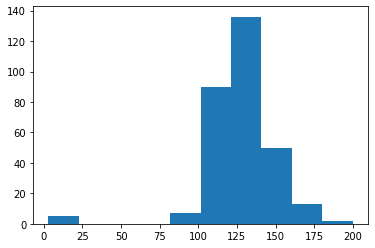

In [200]:
# давление
plt.hist(data['trestbps'], bins=10)

(array([142.,   0.,   0.,  49.,   0.,   0.,  84.,   0.,   0.,  28.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

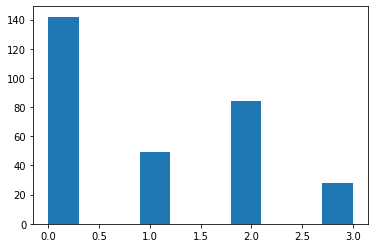

In [201]:
# холестерин
plt.hist(data['cp'], bins=10)

(array([142.,   0.,  49.,   0.,   0.,  84.,   0.,  28.]),
 array([0.   , 0.375, 0.75 , 1.125, 1.5  , 1.875, 2.25 , 2.625, 3.   ]),
 <a list of 8 Patch objects>)

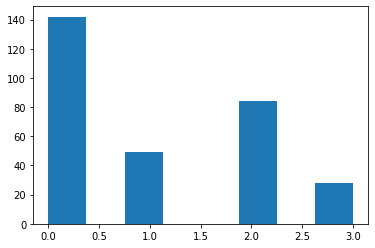

In [202]:
# тип боли
plt.hist(data['cp'], bins=8) 

(array([ 96., 202.,   0.,   5.]),
 array([0.  , 0.75, 1.5 , 2.25, 3.  ]),
 <a list of 4 Patch objects>)

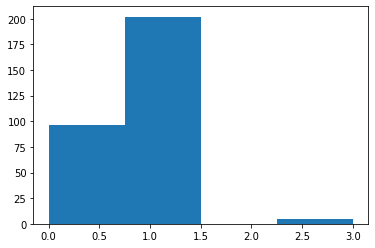

In [203]:
plt.hist(data['sex'], bins=4) 

(array([254.,  44.,   0.,   5.]),
 array([0.  , 0.75, 1.5 , 2.25, 3.  ]),
 <a list of 4 Patch objects>)

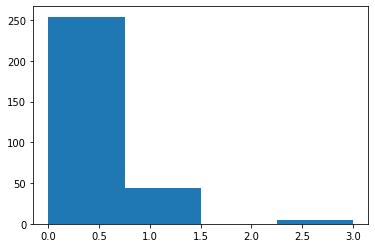

In [204]:
# глюкоза
plt.hist(data['fbs'], bins=4) 

(array([146.,   0., 148.,   0.,   4.,   5.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. ]),
 <a list of 6 Patch objects>)

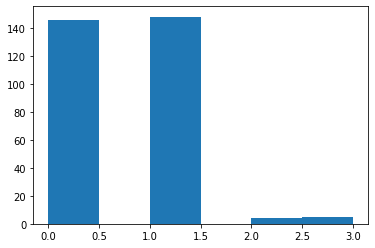

In [205]:
# ЭКГ данные
plt.hist(data['restecg'], bins=6) 

(array([  5.,   0.,   0.,   1.,   7.,  34.,  58., 107.,  80.,  11.]),
 array([  3. ,  22.9,  42.8,  62.7,  82.6, 102.5, 122.4, 142.3, 162.2,
        182.1, 202. ]),
 <a list of 10 Patch objects>)

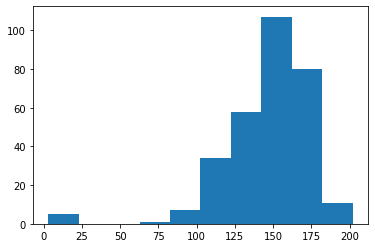

In [206]:
# ЧСС
plt.hist(data['thalach'], bins=10) 

(array([ 21.,   0., 138.,   0., 139.,   5.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. ]),
 <a list of 6 Patch objects>)

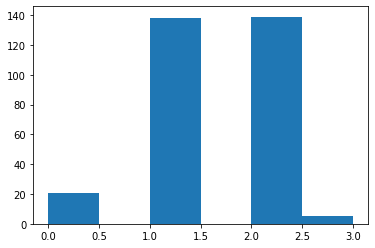

In [207]:
# наклон ST
plt.hist(data['slope'], bins=6)

(array([175.,   0.,  65.,   0.,   0.,  38.,   0.,  25.]),
 array([0.   , 0.375, 0.75 , 1.125, 1.5  , 1.875, 2.25 , 2.625, 3.   ]),
 <a list of 8 Patch objects>)

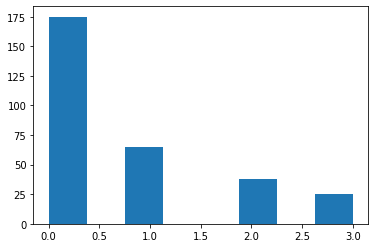

In [208]:
# количество крупных сосудов (0-3), окрашенных с помощью флуороскопии
plt.hist(data['ca'], bins=8) 

(array([137., 161.,   0.,   5.]),
 array([0.  , 0.75, 1.5 , 2.25, 3.  ]),
 <a list of 4 Patch objects>)

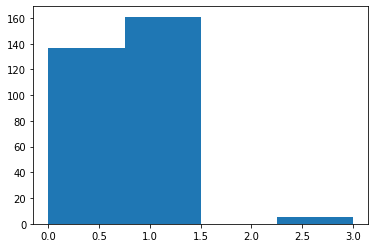

In [209]:
plt.hist(data['target'], bins=4) 

In [210]:
data[['trestbps', 'chol', 'target']].corr()

,trestbps,chol,target
trestbps,1.000000,0.433318,-0.457402
chol,0.433318,1.000000,-0.331288
target,-0.457402,-0.331288,1.000000


In [211]:
data_corr = data[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'ca', 'thal', 'target']].corr()
data_corr

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,thal,target
age,1.000000,-0.379009,-0.193198,0.574438,0.445305,-0.352399,-0.383810,0.129705,-0.286053,0.032994,0.100244,-0.031826,-0.469441
sex,-0.379009,1.000000,0.087711,-0.403906,-0.416623,0.412377,0.231854,-0.373654,0.416933,0.200728,0.235852,0.252301,0.081586
cp,-0.193198,0.087711,1.000000,-0.136790,-0.182948,0.249537,0.154513,0.060220,-0.158446,-0.085152,-0.133249,-0.113726,0.481436
trestbps,0.574438,-0.403906,-0.136790,1.000000,0.433318,-0.399448,-0.427033,0.404736,-0.362058,-0.002939,-0.136176,-0.049990,-0.457402
chol,0.445305,-0.416623,-0.182948,0.433318,1.000000,-0.366894,-0.371818,0.328337,-0.264341,-0.071960,-0.057750,0.007844,-0.331288
fbs,-0.352399,0.412377,0.249537,-0.399448,-0.366894,1.000000,0.328799,-0.456993,0.429742,0.156308,0.314162,0.073491,0.376090
restecg,-0.383810,0.231854,0.154513,-0.427033,-0.371818,0.328799,1.000000,-0.304708,0.265005,0.064987,0.067216,0.067843,0.367196
thalach,0.129705,-0.373654,0.060220,0.404736,0.328337,-0.456993,-0.304708,1.000000,-0.608559,-0.390551,-0.386703,-0.159748,-0.066637
exang,-0.286053,0.416933,-0.158446,-0.362058,-0.264341,0.429742,0.265005,-0.608559,1.000000,0.351388,0.290109,0.246363,0.023098
oldpeak,0.032994,0.200728,-0.085152,-0.002939,-0.071960,0.156308,0.064987,-0.390551,0.351388,1.000000,0.337986,0.236235,-0.242022


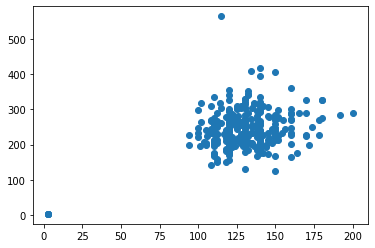

In [212]:
plt.scatter(data['trestbps'], data['chol'])
plt.show()

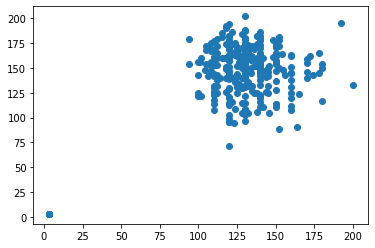

In [213]:
plt.scatter(data['trestbps'], data['thalach'])
plt.show()

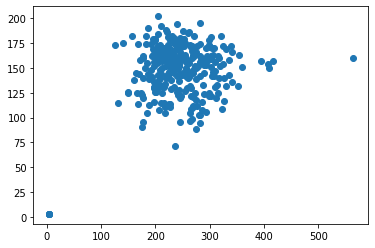

In [214]:
plt.scatter(data['chol'], data['thalach'])
plt.show()

In [215]:
# нормализация данных
data_n = data.copy()
data_n['age'] = (data['age']-data['age'].mean()) / data['age'].std()
data_n['trestbps'] = (data['trestbps']-data['trestbps'].mean()) / data['trestbps'].std()
data_n['chol'] = (data['chol']-data['chol'].mean()) / data['chol'].std()
data_n['thalach'] = (data['thalach']-data['thalach'].mean()) / data['thalach'].std()
data_n['oldpeak'] = (data['oldpeak']-data['oldpeak'].mean()) / data['oldpeak'].std()
data_n

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.840774,1,3,0.647416,-0.164299,1,0,0.100099,0,1.026836,0,0,1,1
1,-1.499727,1,2,0.022548,0.118368,0,1,1.355367,0,2.043051,0,0,2,1
2,-1.139650,0,1,0.022548,-0.646496,0,0,0.846474,0,0.264674,2,0,2,1
3,0.210639,1,1,-0.394031,-0.114417,0,1,1.050031,0,-0.243433,2,0,2,1
4,0.300658,0,0,-0.394031,1.847625,0,1,0.541139,1,-0.412803,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.300658,0,0,0.439126,-0.031279,0,1,-0.815907,1,-0.751541,1,0,3,0
299,-0.779573,1,3,-0.810610,0.351152,0,1,-0.510572,0,0.095305,1,0,3,0
300,1.290870,1,0,0.605758,-0.829398,1,1,-0.205236,0,1.958367,1,2,3,0
301,0.300658,1,0,0.022548,-1.860301,0,1,-1.087316,1,0.095305,1,1,3,0


In [216]:
model = LogisticRegression(solver='liblinear', fit_intercept=False)
ones = np.ones((data_n.shape[0], 1))
x = pd.DataFrame(ones)
x[1] = data_n['cp']

y = data_n['target']

model.fit(x, y)
b_sklearn = model.coef_.flatten()

print(f'Коэффициенты: {b_sklearn}')
print(f'Число итераций: {model.n_iter_}')

Коэффициенты: [ 0.66480257 -0.95442377 -0.59378977  0.77314296 -4.1337788   0.51871288]
Число итераций: [6]


In [221]:
model = LogisticRegression(solver='liblinear', fit_intercept=False)
ones = np.ones((data_n.shape[0], 1))
x = pd.DataFrame(ones)
x[1] = data_n['slope']

y = data_n['target']

model.fit(x, y)
b_sklearn = model.coef_.flatten()

print(f'Коэффициенты: {b_sklearn}')
print(f'Число итераций: {model.n_iter_}')

Коэффициенты: [ 1.35891174 -1.11555528 -1.03513764  0.82996071 -4.13846493  0.44330874]
Число итераций: [6]


In [217]:
model = LogisticRegression(solver='liblinear', fit_intercept=False)
ones = np.ones((data_n.shape[0], 1))
x = pd.DataFrame(ones)
x[1] = data_n['cp']
x[2] = data_n['slope']
y = data_n['target']

model.fit(x, y)
b_sklearn = model.coef_.flatten()

print(f'Коэффициенты: {b_sklearn}')
print(f'Число итераций: {model.n_iter_}')

Коэффициенты: [ 2.05017059 -0.90066377 -1.03540463 -1.53137712  0.71701151  0.71026748
 -4.37768669  0.46536223  0.23228525]
Число итераций: [6]
